<a href="https://colab.research.google.com/github/nyp-sit/sdaai-iti103/blob/master/2021S1_ml_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITI103: Essentials of Machine Learning - Assignment 1

## Introduction

In this assignment, you will work a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It is a modernized alternative to the well-known Boston Housing dataset. 

You may access the dataset from [https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/assignments/data/ames_house_prices_simple.csv) For a detailed description of each field (feature), you can refer to the following [file](https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/assignments/data/data_description.txt)


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 200) 
pd.set_option('display.max_rows',200)

### Question 1 (2 marks)

Complete the code below and answer the following: 
- How many rows and columns are there?
- What are the different data types of the columns? 

_Type your answer here_

rows = 1379
cols = 40

There are 3 different data types for the columns, namely, int64, float64 and object

In [2]:
## START YOUR CODE
import pandas as pd

# Import the data 
url = 'https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/assignments/data/ames_house_prices_simple.csv'
df = pd.read_csv(url)

print ("Dataframe shape: \n", df.shape)
# Display value counts of each data type
# Ref: https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type
# list(df.select_dtypes(['object']).columns)
#print ("Selected dataframe columns based on specified type: \n", df.select_dtypes(include='object').columns)

#print ("value counts: \n", df.value_counts())

print ("Dataframe Info\n")
print (df.info())
## END YOUR CODE

Dataframe shape: 
 (1379, 40)
Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1379 non-null   int64  
 1   GrLivArea      1379 non-null   float64
 2   TotalBsmtSF    1379 non-null   float64
 3   2ndFlrSF       1379 non-null   float64
 4   1stFlrSF       1379 non-null   float64
 5   BsmtFinSF1     1379 non-null   float64
 6   GarageCars     1379 non-null   int64  
 7   FullBath       1379 non-null   int64  
 8   GarageArea     1379 non-null   float64
 9   LotArea        1379 non-null   float64
 10  MasVnrArea     1379 non-null   float64
 11  YearBuilt      1379 non-null   int64  
 12  YearRemodAdd   1379 non-null   int64  
 13  GarageYrBlt    1379 non-null   float64
 14  BsmtUnfSF      1379 non-null   float64
 15  BsmtQual       1379 non-null   object 
 16  LotFrontage    1379 non-null   float64
 17  OpenPo

### Question 2 (5 marks)

Examine the column dtype and read the column description in data_description.txt.  Determine which columns are categorical. Create a list that contains the column names that are categorical. 

In [3]:
## START YOUR CODE

# Get the list of column names that are object type
# Ref: https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type
# Ref: https://nycdatascience.com/blog/student-works/machine-learning-house-price-prediction-ames-iowa/
# Ref: https://jovian.ai/seanbenhur/ames-housing
# Ref: https://towardsdatascience.com/wrangling-through-dataland-modeling-house-prices-in-ames-iowa-75b9b4086c96
# Ref: https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

cat_attribs = list(df.select_dtypes(['object']).columns)     
print ('Categorical Columns: \n', cat_attribs, '\n')

# add additional column name that you think should be categorical
# more = ['MSSubClass', 'OverallQual', 'OverallCond']
# additional_categorical_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold']
# print ("Additional Categorical columns: \n", additional_categorical_cols)

# categorical_cols.extend(more)
# print ("Extended Categorical columns: \n", categorical_cols)

num_attribs = list(df.select_dtypes(['int64']).columns)
print ('Numerical Columns: ', num_attribs, '\n')

# Ref: https://stackoverflow.com/questions/36268749/remove-multiple-items-from-a-python-list-in-just-one-statement
list_to_remove = ['GarageCars', 'FullBath', 'TotRmsAbvGrd', 'BedroomAbvGr', 'HalfBath']
num_attribs = list(set(num_attribs) - set(list_to_remove))
num_attribs.append('GarageYrBlt')
print ('Additional Numerical Categorical Columns: ', num_attribs, '\n')

fp_attribs = list(df.select_dtypes(['float64']).columns)
# Drop 'GarageYrBlt'. This has been moved to the num_attributes list above
fp_attribs.remove('GarageYrBlt')
# fp_attribs.insert(len(fp_attribs), list_to_remove) this will create a list within list
# Ref: https://www.geeksforgeeks.org/python-insert-list-in-another-list/
fp_attribs[len(fp_attribs)-1:len(fp_attribs)-1] = list_to_remove
print ('FP Columns: ', fp_attribs, '\n')

## END YOUR CODE

Categorical Columns: 
 ['BsmtQual', 'GarageType', 'BsmtExposure', 'LotShape', 'MSZoning', 'MasVnrType', 'ExterQual', 'FireplaceQu', 'KitchenQual', 'Condition1', 'BldgType', 'SaleCondition', 'Street', 'PavedDrive', 'SaleType'] 

Numerical Columns:  ['OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'OverallCond', 'TotRmsAbvGrd', 'MSSubClass', 'MoSold', 'BedroomAbvGr', 'HalfBath'] 

Additional Numerical Categorical Columns:  ['YearRemodAdd', 'YearBuilt', 'OverallQual', 'MSSubClass', 'MoSold', 'OverallCond', 'GarageYrBlt'] 

FP Columns:  ['GrLivArea', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'BsmtFinSF1', 'GarageArea', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'LotFrontage', 'OpenPorchSF', 'WoodDeckSF', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'BedroomAbvGr', 'HalfBath', 'SalePrice'] 



### Question 3 (8 marks)

Think about the 'YearBuilt' and 'MoSold' columns (which represent the year the house is built and the month it was sold). They are of numeric (integer) type. Should you transform it?  Give your reason for the answer.

If your answer is 'Yes', write the code to transform it.

_Type your answer here_

Yes, **(YearBuilt)** age of house & **(MoSold)** month sold could affect housing price; 

In [4]:
# Make a copy of the original dataframe and do all the processing on the copy 
# use the data for subsequent cells

data = df.copy()

In [5]:
## START YOUR CODE HERE ## 
import numpy as np

# find how many different years are there to decide if need to bin it
# print ("nunique: \n", data.nunique())

unique_years = len(np.sort(data['YearBuilt'].unique()))
print ("Unique Years: ", unique_years, '\n')

# print (np.sort(data['MoSold'].unique()))
# Gets the list of existing column names, this will be used later for adding the new columns to the front of the list
existing_cols = list(data.columns.values)
print ("existing columns: \n", existing_cols, '\n')

# we can either bin the years into pre-1900, 1901-1920, 1921-1930, etc. or simple create 10 bins
myLabels = ['1880-1900', '1901-1910', '1911-1920', '1921-1930', '1931-1940', 
            '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', 
            '1991-2000', '2001-2010']

# Ref: https://dfrieds.com/data-analysis/bin-values-python-pandas.html
# Convert new column from 'category' to 'string' type so that encoding can happen properly
# Ref: https://stackoverflow.com/questions/46775308/pandas-cut-how-to-convert-categorical-labels-to-strings-otherwise-cannot-expor
data["YearBuilt_cat"] = pd.cut(data["YearBuilt"],
                               bins=[1880, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
                               labels=myLabels, include_lowest=True).astype(str)
print ("sorted: \n", data.YearBuilt_cat.value_counts().sort_index(), '\n')

# One way to bin the months is to divide the months into different seasons, if we think there is some seasonal pattern
spring = [3,4,5]
summer = [6,7,8]
autumn = [9,10,11]
winter = [12,1,2]

def month_to_season(month):
    if month in spring: 
        return 'spring'
    if month in summer:
        return 'summer'
    if month in autumn:
        return 'autumn'
    if month in winter:
        return 'winter'
    
data['BinnedMoSold'] = data['MoSold'].map(month_to_season)
print ("Binned Month Sold: \n", data['BinnedMoSold'])

# add the new columns to the front, for easier feature/target separation later
new_cols = ['YearBuilt_cat', 'BinnedMoSold'] + existing_cols
print ("Updated cols: \n", new_cols, '\n')

# Ref: https://www.kite.com/python/answers/how-to-reorder-columns-in-a-pandas-dataframe-in-python
data = data.reindex(columns=new_cols)

# drop all the transformed columns
# print ("Before drop: \n", data.columns)
data.drop(columns=['MoSold', 'YearBuilt'], axis=1, inplace=True)
# data1 = data.drop(columns=['MoSold', 'YearBuilt'], axis=1)
# print ("After drop: \n", data.columns)

print ('Updated DATA: ', data.columns)

# Removed the dropped colmns from the num_attribs list
cols_removed = ['MoSold', 'YearBuilt']
num_attribs = [ele for ele in num_attribs if ele not in cols_removed]
print ('Updated Numerical Attributes: \n', num_attribs, '\n')
print ('Original Categorical Attributes: ', cat_attribs)

cat_attribs = list(data.select_dtypes(['object']).columns)
print ('Updated Categorical Attributes: \n', cat_attribs)

print (data.isnull().sum())
'''
data_ohe = pd.get_dummies(data)
data2 = pd.get_dummies(data, columns=categorical_cols)
data_ohe.head()
'''
## END YOUR CODE HERE ## 

Unique Years:  109 

existing columns: 
 ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'BsmtFinSF1', 'GarageCars', 'FullBath', 'GarageArea', 'LotArea', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'BsmtUnfSF', 'BsmtQual', 'LotFrontage', 'OpenPorchSF', 'OverallCond', 'GarageType', 'WoodDeckSF', 'TotRmsAbvGrd', 'MSSubClass', 'MoSold', 'BsmtExposure', 'LotShape', 'MSZoning', 'BedroomAbvGr', 'MasVnrType', 'ExterQual', 'HalfBath', 'FireplaceQu', 'KitchenQual', 'Condition1', 'BldgType', 'SaleCondition', 'Street', 'PavedDrive', 'SaleType', 'SalePrice'] 

sorted: 
 1880-1900     21
1901-1910     17
1911-1920     56
1921-1930     66
1931-1940     55
1941-1950     73
1951-1960    157
1961-1970    176
1971-1980    164
1981-1990     60
1991-2000    173
2001-2010    361
Name: YearBuilt_cat, dtype: int64 

Binned Month Sold: 
 0       winter
1       spring
2       autumn
3       winter
4       winter
         ...  
1374    summer
1375    winter
1376    spring
1377 

'\ndata_ohe = pd.get_dummies(data)\ndata2 = pd.get_dummies(data, columns=categorical_cols)\ndata_ohe.head()\n'

### Question 4 (5 marks)

Use appropriate encoding for the categorical columns. 


In [6]:
## START YOUR CODE HERE ## 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.compose import make_column_transformer

print ("Categorical Features: ", cat_attribs, '\n')
print ("Numercial Features: ", num_attribs, '\n')

ct = make_column_transformer(
    (OrdinalEncoder(), cat_attribs), # # Use: OrdinalEncoder, LabelEncoder for categorical features
    (OneHotEncoder(), num_attribs), # use: OneHotEncoder, LabelBinarizer for numerical feature
    #remainder='passthrough'
)
df_transformed = ct.fit_transform(data)

data_preprocessed = pd.DataFrame(df_transformed.toarray(), index=data.index)
print ('data_preprocessed columns: \n', data_preprocessed.columns, 'Total Columns (Pre-processed): ', data_preprocessed.shape)
print ('data_preprocessed: \n', data_preprocessed.tail())

combined_num_cat_attribs = num_attribs + cat_attribs
print ("Combined: \n", combined_num_cat_attribs, 'Total Columns (Categorical + Numerical): ', len(combined_num_cat_attribs))
print ("Original Columns: \n", data.columns)
data_remaining = data.drop(combined_num_cat_attribs, axis=1)
print ('Data Remaining Columns: \n', data_remaining.columns, 'Total Dimension: ', data_remaining.shape)

data_cleaned = pd.concat([data_preprocessed, data_remaining], axis=1)
print ('Data Cleaned Columns: \n', data_cleaned.columns, 'Total Dimension \n', data_cleaned.shape)
data_cleaned.head()
## START YOUR CODE HERE ## 

Categorical Features:  ['YearBuilt_cat', 'BinnedMoSold', 'BsmtQual', 'GarageType', 'BsmtExposure', 'LotShape', 'MSZoning', 'MasVnrType', 'ExterQual', 'FireplaceQu', 'KitchenQual', 'Condition1', 'BldgType', 'SaleCondition', 'Street', 'PavedDrive', 'SaleType'] 

Numercial Features:  ['YearRemodAdd', 'OverallQual', 'MSSubClass', 'OverallCond', 'GarageYrBlt'] 

data_preprocessed columns: 
 RangeIndex(start=0, stop=207, step=1) Total Columns (Pre-processed):  (1379, 207)
data_preprocessed: 
        0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
1374  10.0  2.0  3.0  1.0  4.0  3.0  3.0  2.0  3.0  5.0  3.0  2.0  0.0  4.0   
1375   8.0  3.0  2.0  1.0  3.0  3.0  3.0  3.0  3.0  5.0  3.0  2.0  0.0  4.0   
1376   5.0  1.0  4.0  1.0  3.0  3.0  3.0  2.0  0.0  2.0  2.0  2.0  0.0  4.0   
1377   5.0  1.0  4.0  1.0  2.0  3.0  3.0  2.0  3.0  3.0  2.0  2.0  0.0  4.0   
1378   7.0  2.0  4.0  1.0  3.0  3.0  3.0  2.0  2.0  3.0  3.0  2.0  0.0  4.0   

      14   15   16   17   18   19

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,GrLivArea,TotalBsmtSF,2ndFlrSF,1stFlrSF,BsmtFinSF1,GarageCars,FullBath,GarageArea,LotArea,MasVnrArea,BsmtUnfSF,LotFrontage,OpenPorchSF,WoodDeckSF,TotRmsAbvGrd,BedroomAbvGr,HalfBath,SalePrice
0,11.0,3.0,2.0,1.0,3.0,3.0,3.0,1.0,2.0,3.0,2.0,2.0,0.0,4.0,1.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1710.0,856.0,854.0,856.0,706.0,2,2,548.0,8450.0,196.0,150.0,65.0,61.0,0.0,8,3,1,208500.0
1,8.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0,1.0,0.0,4.0,1.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1262.0,1262.0,0.0,1262.0,978.0,2,2,460.0,9600.0,0.0,284.0,80.0,0.0,298.0,6,3,0,181500.0
2,11.0,0.0,2.0,1.0,2.0,0.0,3.0,1.0,2.0,5.0,2.0,2.0,0.0,4.0,1.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1786.0,920.0,866.0,920.0,486.0,2,2,608.0,11250.0,162.0,434.0,68.0,42.0,0.0,6,3,1,223500.0
3,2.0,3.0,4.0,5.0,3.0,0.0,3.0,2.0,3.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Question 5 (5 marks)
- Separate your data into features and target label ('SalePrice') columns. 
- Create train/test splits. Decide on the most appropriate splitting strategy.


In [7]:
## START YOUR CODE HERE ## 
from sklearn.model_selection import train_test_split

print ('data cleaned: ', data_cleaned.shape)
# print ('SalePrice \n', data_cleaned.iloc[:, 224])
#print (data_cleaned.columns)
#print (len(data_cleaned.columns))
#col_idx = data_cleaned.columns.get_loc('SalePrice')
#print (col_idx)

target_col_idx = len(data_cleaned.columns) - 1
# X_train, x_test, Y_train, y_test = train_test_split(data_cleaned.iloc[:, :224], data_cleaned.iloc[:, 224], 
#                                                     test_size = 0.2, shuffle=True, random_state=7)

X_train, x_test, Y_train, y_test = train_test_split(data_cleaned.iloc[:, :target_col_idx], data_cleaned.iloc[:, target_col_idx], 
                                                    test_size = 0.2, shuffle=True, random_state=7)

print ('X_train: ', type(X_train), 'x_test: ', type(x_test), 'Y_train: ', type(Y_train), 'y_test: ', type(y_test))
print ('X_train: ', X_train.shape, 'x_test: ', x_test.shape, 'Y_train: ', Y_train.shape, 'y_test: ', y_test.shape)

print ('X_train: ', X_train.head())
## END YOUR CODE HERE ##

data cleaned:  (1379, 225)
X_train:  <class 'pandas.core.frame.DataFrame'> x_test:  <class 'pandas.core.frame.DataFrame'> Y_train:  <class 'pandas.core.series.Series'> y_test:  <class 'pandas.core.series.Series'>
X_train:  (1103, 224) x_test:  (276, 224) Y_train:  (1103,) y_test:  (276,)
X_train:           0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
643    9.0  0.0  2.0  1.0  2.0  0.0  3.0  2.0  2.0  5.0  2.0  2.0  4.0  4.0   
863    3.0  2.0  4.0  5.0  3.0  3.0  4.0  2.0  3.0  3.0  3.0  2.0  0.0  0.0   
426   11.0  2.0  3.0  1.0  4.0  3.0  1.0  2.0  2.0  3.0  2.0  2.0  0.0  4.0   
1146   7.0  1.0  4.0  1.0  0.0  0.0  3.0  2.0  3.0  3.0  3.0  2.0  0.0  4.0   
752    4.0  2.0  2.0  5.0  3.0  3.0  3.0  1.0  3.0  5.0  2.0  1.0  0.0  4.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
643   1.0  2.0  8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
863   1.0  2.0  8.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

### Question 6 (7 marks)

* Scale the all the numerical (non categorical) features using one of the following: `StandardScaler`, `MinMaxScaler`
* Be sure to fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.
* Optional: You may also want to calculate the skewness of your numeric features and decide if you need to do log transform. 

In [8]:
numeric_cols = []

for col in X_train.columns:
    if X_train[col].dtype == np.float64:
        numeric_cols.append(col)
print(numeric_cols)

print ('Type: ', type(numeric_cols))
# Ref: https://www.geeksforgeeks.org/python-pandas-index-dtype/
numeric_cols = pd.Index(numeric_cols)

# Ref: https://www.debugcn.com/en/article/39567566.html. If use above code snippet w/o converting to Pandas Index.dtype
# will cause columntransformer to fail!!
# numeric_cols = X_train.select_dtypes(include=np.float64).columns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'BsmtFinSF1', 'GarageA

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
ct = make_column_transformer(
    (std_scaler, numeric_cols),
    remainder='passthrough'
)

print (X_train.head())
X_train_scaled = ct.fit_transform(X_train)

# Y_train_scaled = std_scaler.fit_transform(Y_train.values.reshape(-1, 1))

print (X_train_scaled)
# print (Y_train_scaled)
print (Y_train)

# x_test_scaled = ct.fit_transform(x_test)
x_test_scaled = ct.transform(x_test)
# y_test_scaled = std_scaler.fit_transform(y_test.values.reshape(-1, 1))

         0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
643    9.0  0.0  2.0  1.0  2.0  0.0  3.0  2.0  2.0  5.0  2.0  2.0  4.0  4.0   
863    3.0  2.0  4.0  5.0  3.0  3.0  4.0  2.0  3.0  3.0  3.0  2.0  0.0  0.0   
426   11.0  2.0  3.0  1.0  4.0  3.0  1.0  2.0  2.0  3.0  2.0  2.0  0.0  4.0   
1146   7.0  1.0  4.0  1.0  0.0  0.0  3.0  2.0  3.0  3.0  3.0  2.0  0.0  4.0   
752    4.0  2.0  2.0  5.0  3.0  3.0  3.0  1.0  3.0  5.0  2.0  1.0  0.0  4.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
643   1.0  2.0  8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
863   1.0  2.0  8.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
426   1.0  2.0  8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1146  1.0  2.0  8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
752   1.0  2.0  8.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       28   29   30   31   32   33   34   35   36   37  

In [10]:
# Test Skewess
print (data_cleaned.skew().min(), data_cleaned.skew().max())
print ('Data highly skewed!!')

# log tranform - data columns have too many 0's in them resulting in NaN!!

-16.534759453898094 37.13488925525427
Data highly skewed!!


### Question 7 (5 marks)

* Fit a Linear Regression model on the training data. Apply regularization if necessary. 
* Calculate the mean squared error on both the train and test set
* Calculate the R-square error on both train and test set 

What can you conclude from the result? 

_Type your answer here_

**Linear Regression**

The large value for the MSE indicates that the model accuracy is bad. The ideal case is for the MSE to be as close to zero as possible.

The negative R2 score indicates that the chosen model (Linear Regression) does not follow the trend of the data, so it fits worse than a horizontal line i.e. linear regression fits the data really poorly.

**Lasso & Ridge Regression**

Applying Lasso and Ridge regularization seemed to improve model accuracy as evidenced by the big drop in RMSE. The best possible R2 score is 1. So the closer the value it is to 1 as evidenced in Lasso and Ridge regression, means the more precisely the model is able to predict the sale price. 

In [11]:
# Mean Absolute Percentage Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [12]:
X_train_scaled

array([[ 0.44452208, -1.68444128, -0.79313964, ...,  6.        ,
         3.        ,  0.        ],
       [-1.58854434,  0.55000097,  1.0862009 , ...,  6.        ,
         3.        ,  0.        ],
       [ 1.12221088,  0.55000097,  0.14653063, ...,  6.        ,
         3.        ,  1.        ],
       ...,
       [-0.57201113, -1.68444128,  1.0862009 , ...,  4.        ,
         2.        ,  0.        ],
       [-2.60507755,  1.66722209,  0.14653063, ..., 11.        ,
         4.        ,  0.        ],
       [ 1.12221088,  0.55000097, -2.67248019, ...,  5.        ,
         0.        ,  1.        ]])

In [13]:
## START YOUR CODE HERE

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
# lr.fit(X_train_scaled, Y_train_scaled)
lr.fit(X_train_scaled, Y_train)

'''
lr_predictions = lr.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
'''
lr_predictions = lr.predict(x_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)

lr_rmse = np.sqrt(lr_mse)
print ('lr_rmse: ', lr_rmse)

'''
lr_r2_score = r2_score(y_test, lr_predictions)
'''
lr_r2_score = r2_score(y_test, lr_predictions)
print ('lr_r2_score: ', lr_r2_score, '\n')

# Lasso
# Ref: https://www.askpython.com/python/examples/lasso-regression
lasso_model = Lasso(alpha=1.0)
lasso = lasso_model.fit(X_train_scaled , Y_train)
lasso_predictions = lasso.predict(x_test_scaled)
lasso_MAPE = MAPE(y_test, lasso_predictions)
# print("MAPE value: ", lasso_MAPE)
Accuracy = 100 - lasso_MAPE
# print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print ('lasso_rmse: ', lasso_rmse)
lasso_r2_score = r2_score(y_test, lasso_predictions)
print ('lasso r2 score: ', lasso_r2_score, '\n')

# Ridge
ridge_model = Ridge(alpha=1.0)
ridge = ridge_model.fit(X_train_scaled , Y_train)
ridge_predictions = ridge.predict(x_test_scaled)
ridge_MAPE = MAPE(y_test, ridge_predictions)
# print("MAPE value: ", ridge_MAPE)
Accuracy = 100 - ridge_MAPE
# print('Accuracy of Ridge Regression: {:0.2f}%.'.format(Accuracy))

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print ('lasso_rmse: ', ridge_rmse)

ridge_r2_score = r2_score(y_test, ridge_predictions)
print ('ridge r2 score: ', ridge_r2_score, '\n')
## END YOUR CODE

lr_rmse:  237320621191345.28
lr_r2_score:  -8.230608030759833e+18 

lasso_rmse:  40798.273040816486
lasso r2 score:  0.7567546611077797 

lasso_rmse:  40784.797863240216
ridge r2 score:  0.7569153165761255 



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18506100940.277832, tolerance: 670676335.171703
  model = cd_fast.enet_coordinate_descent(


### Question 8 (5 marks)

* Now train a RandomForestRegressor by using `RandomForestRegressor(n_estimators=30)`
* Find the MSE and R-sqaure score on both train and test set.

In [14]:
## START YOUR CODE HERE ##
rfr = RandomForestRegressor(n_estimators = 30, random_state = 8)
# Ref: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
# rfr.fit(X_train_scaled, Y_train.ravel())
rfr.fit(X_train_scaled, Y_train)


#rfr_predictions = rfr.predict(x_test)
#rfr_mse = mean_squared_error(y_test, rfr_predictions)

rfr_predictions = rfr.predict(x_test_scaled)
rfr_mse = mean_squared_error(y_test, rfr_predictions)

rfr_rmse = np.sqrt(rfr_mse)
print ('rfr_rmse: ', rfr_rmse)


#rfr_r2_score = r2_score(y_test, rfr_predictions)

rfr_r2_score = r2_score(y_test, rfr_predictions)

print ('rfr_r2_score: ', rfr_r2_score)

## END YOUR CODE HERE ## 

rfr_rmse:  35947.63505879593
rfr_r2_score:  0.8111566852835044


### Question 9 (4 marks)

Plot predicted prices vs actual prices for the RandomForestRegressor model. 

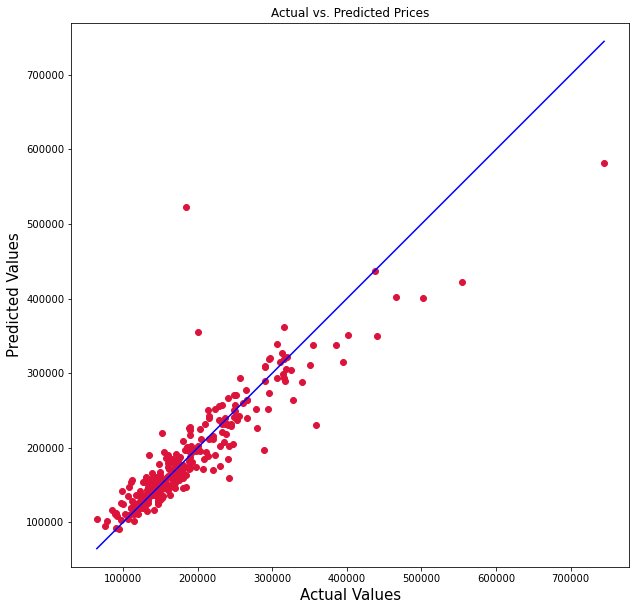

In [15]:
## START YOUR CODE HERE ## 
import matplotlib.pyplot as plt
import seaborn as sns

# Ref: https://towardsdatascience.com/random-forest-ca80e56224c1
plt.figure(figsize=(10, 10))

# ax = sns.distplot(y_test_scaled, hist=False, color='r', label='Acutal Prices')
# ax = sns.distplot(y_test, hist=False, color='r', label='Acutal Prices')
# sns.distplot(rfr_predictions, hist=False, color='b', label='Predicted Prices', ax=ax)
plt.scatter(y_test, rfr_predictions, c='crimson')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')

p1 = max(max(rfr_predictions), max(y_test))
p2 = min(min(rfr_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

# Ref: https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot
# plt.legend()
plt.title('Actual vs. Predicted Prices')
plt.show()
## END YOUR CODE HERE ## 

### Question 10 (2 marks)

What can you conclude from the plot?

_Type your answer here_

From the graph, it is observed that the model appears to predict the prices fairly well. If we draw a straight line through the points, we observe that most of the data values are clusterd along the straight line. Having said that, there are a number of outliers. At actual price (210K), the predicted value was around 350K and another was predicted at 560K. At the higher end, actual value (750K), predicted value was lower around 550K.

### Question 11 (2 marks)

Noticed that we did not ask you to evaluate the result on the validation set, as our train set is pretty small (less than 1000 samples). We can however, use K-fold cross-validation to evaluate our model. 

- Use 5-fold cross-validation to train and evaluate our model (use RandomForestRegressor)
- Compute the average MSEs across all folds. 

In [16]:
from sklearn.model_selection import KFold

# Ref: https://financetrain.com/k-fold-cross-validation-example-python-scikit-learn/

# We use enumerate() to return also the index position of the list so that we can print out the fold number

'''
How enumerate(iterable, startIndex) works
mylist = ['A', 'B' ,'C', 'D']
e_list = enumerate(mylist)
print(list(e_list))
[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D')]
'''

kf = KFold(n_splits=5, shuffle=True, random_state=8)
print (Y_train.index)
# Ref: https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12
# Ref: https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833
scores = []
for train_index, test_index in kf.split(X_train):
    #print('Train Index: \n', train_index)
    #print ('Test Index: \n', test_index)
    '''
    X_train_1 = X_train_scaled[train_index]
    x_test_1 = X_train_scaled[test_index]
    Y_train_1 = Y_train.iloc[train_index]
    y_test_1 = Y_train.iloc[test_index]
    '''
    X_train_1, x_test_1, Y_train_1, y_test_1 = X_train_scaled[train_index], X_train_scaled[test_index], Y_train.iloc[train_index], Y_train.iloc[test_index]
    rfr.fit(X_train_1, Y_train_1)
    #scores.append(rfr.score(x_test_1, y_test_1))
    rfr_predictions_1 = rfr.predict(x_test_1)
    rfr_mse_1 = mean_squared_error(y_test_1, rfr_predictions_1)
    scores.append(rfr_mse_1)
    '''
    rfr_predictions = rfr.predict(x_test)
    rfr_mse = mean_squared_error(y_test, rfr_predictions)
    rfr_rmse = np.sqrt(lr_mse)
    print ('rfr_rmse: ', rfr_rmse)
    '''

print(list(enumerate(scores, 1)))
print ('Average mse across folds: ', sum(scores)/len(scores))
# Ref: https://www.kaggle.com/satishgunjal/tutorial-k-fold-cross-validation
# score = cross_val_score(rfr, X, y, cv= kf, scoring="mean_squared_error")

Int64Index([ 643,  863,  426, 1146,  752,  747, 1224,   96,  603, 1253,
            ...
             345,  535, 1209, 1372,  919,  211,  502,  537, 1220,  175],
           dtype='int64', length=1103)
[(1, 1808856182.5442233), (2, 1027381900.2644897), (3, 514660752.40422326), (4, 759642598.1107727), (5, 719282441.7895705)]
Average mse across folds:  965964775.0226558
